<a href="https://colab.research.google.com/github/Isaias13Barros/Assignment_6/blob/main/Hiperpar%C3%A2metros_otimizados_para_o_F1_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Criar um modelo de Machine Learning com hiperparâmetros otimizados para o F1 Score (Uma métrica para problemas de classificação).

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Impotando dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv.xls")

#Explorando os dados do dataset

In [12]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#Verificar Linhas e Colunas

In [6]:
df.shape

(303, 14)

#Estatísticas descritivas

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Verificando os tipos de dados

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#verificar se há algum valor faltando

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Correlação para ver quais características têm mais efeito

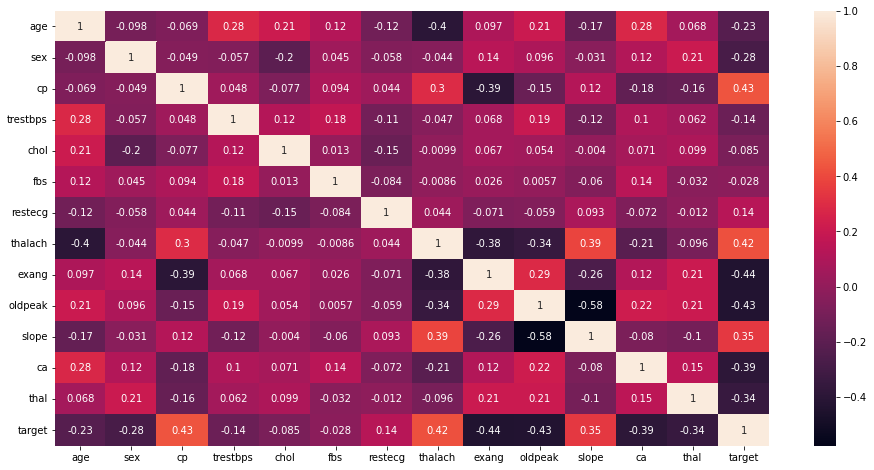

In [19]:
plt.figure(figsize = (16, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

#Classificação com Decision Tree

In [20]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
Tree_yhat = dt.predict(X_test) 

#Avaliação Decision Tree

In [32]:
from sklearn import metrics

In [33]:
dt_Score = metrics.accuracy_score(y_test, Tree_yhat) 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("DecisionTrees's Accuracy: ", dt_Score)

Train set Accuracy:  0.8677685950413223
DecisionTrees's Accuracy:  0.8524590163934426


#Definindo uma função para traçar a matriz de confusão (vamos usá-la para todos os métodos)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score ,f1_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
print (classification_report(y_test, Tree_yhat))
dt_Recall = recall_score(y_test, Tree_yhat)
dt_F1Score = f1_score(y_test, Tree_yhat)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



#Classificação com SVM

In [68]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [70]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
SVM_yhat = SVM.predict(X_test)
SVM_yhat [0:5]

array([1, 1, 1, 1, 0])

In [72]:
from sklearn import metrics

SVM_Score = metrics.accuracy_score(y_test, SVM_yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM.predict(X_train)))
print("SVM's Accuracy: ", SVM_Score)

Train set Accuracy:  0.6735537190082644
SVM's Accuracy:  0.6721311475409836


In [73]:
print (classification_report(y_test, SVM_yhat))
SVM_Recall = recall_score(y_test, SVM_yhat)
SVM_F1Score = f1_score(y_test, SVM_yhat)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    accuracy                           0.67        61
   macro avg       0.67      0.63      0.63        61
weighted avg       0.67      0.67      0.65        61



In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)

In [77]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [78]:
y_pred = clf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, y_pred)*100

83.60655737704919

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
clf_s = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=1000)

In [86]:
clf_s.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [87]:
y_pred = clf_s.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)*100

83.60655737704919

In [90]:
print (classification_report(y_test, y_pred))
SVM_Recall = recall_score(y_test, y_pred)
SVM_F1Score = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

